Threshold


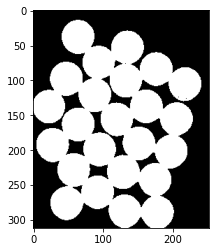

Opening


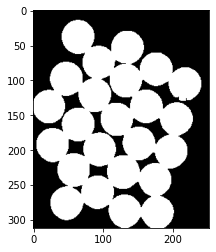

Sure Background


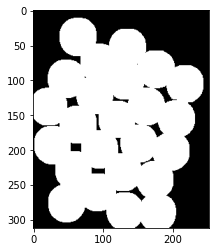

Distance Transformation


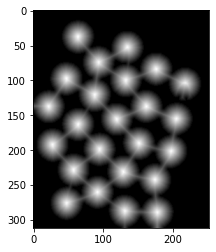

Sure Foreground


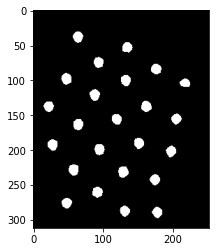

Unknown


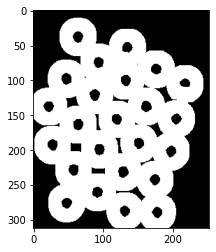

Markers


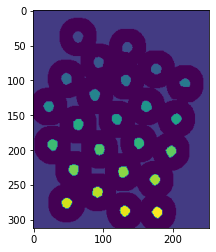

Markers Watershed


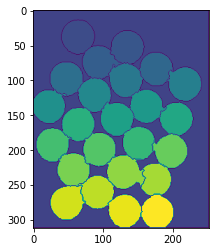

Markers Watershed with image


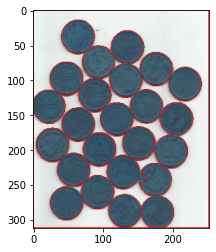

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
print("Threshold")
plt.imshow(thresh,cmap='gray')
plt.show()

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
print("Opening")
plt.imshow(opening,cmap='gray')
plt.show()

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
print("Sure Background")
plt.imshow(sure_bg,cmap='gray')
plt.show()

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,0)
print("Distance Transformation")
plt.imshow(dist_transform,cmap='gray')
plt.show()

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
print("Sure Foreground")
plt.imshow(sure_fg,cmap='gray')
plt.show()

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
print("Unknown")
plt.imshow(unknown,cmap='gray')
plt.show()

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+5

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
print("Markers")
plt.imshow(markers)
plt.show()

markers = cv2.watershed(img,markers)
print("Markers Watershed")
plt.imshow(markers)
plt.show()
img[markers == -1] = [255,0,0]	
print("Markers Watershed with image")
plt.imshow(img)
plt.show()